# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Achmad Noer Aziz
- Email: achmadnoeraziz08@gmail.com
- Id Dicoding: achmadnoer

## Menentukan Pertanyaan Bisnis

- Kapan jumlah pengguna sepeda mencapai angka tertinggi?
- Bagaimana perbandingan pengguna sepeda pada tahun pertama dan kedua?
- Bagaimana pengaruh hari libur terhadap jumlah pengguna sepeda?
- Bagaimana pengaruh kondisi klimatologi (suhu, kelembaban, dan kecepatan angin) terhadap pengguna sepeda?


## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white')

Link Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

In [2]:
! ls "./dataset/bike-sharing-dataset"

Readme.txt
day.csv
hour.csv


## Data Wrangling

### Gathering Data

In [3]:
bike_data = pd.read_csv("./dataset/bike-sharing-dataset/hour.csv")

In [4]:
bike_data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
bike_data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Assessing Data

In [7]:
bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike_data.duplicated().sum()

0

### Cleaning Data

In [9]:
bike_data.drop(['instant','dteday','atemp'], axis=1, inplace=True)

In [10]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [11]:
bike_data.columns = ['season','year','month','hour','is_holiday','day','is_workingday','weather','temperature','humidity','wind_speed','user_casual','user_registered','user_count']

In [12]:
bike_data = bike_data.reindex(columns=['hour','day','month','year','is_holiday','is_workingday','season','weather','temperature','humidity','wind_speed','user_casual','user_registered','user_count'])

In [13]:
bike_data["is_holiday"] = bike_data["is_holiday"].astype("boolean")
bike_data["is_workingday"] = bike_data["is_workingday"].astype("boolean")

bike_data["day"].replace({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"}, inplace=True)
bike_data["month"].replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}, inplace=True)
bike_data["year"].replace({0:"2011", 1:"2012"}, inplace=True)
bike_data["season"].replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace=True)
bike_data["weather"].replace({1:"Clear", 2:"Cloudy", 3:"Light Rain", 4:"Heavy Rain"}, inplace=True)

bike_data["day"] = pd.Categorical(bike_data["day"], categories=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], ordered=True)
bike_data["month"] = pd.Categorical(bike_data["month"], categories=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], ordered=True)
bike_data["year"] = pd.Categorical(bike_data["year"], categories=["2011","2012"], ordered=True)

In [14]:
bike_data.sample(5)

,hour,day,month,year,is_holiday,is_workingday,season,weather,temperature,humidity,wind_speed,user_casual,user_registered,user_count
11598,11,Thu,May,2012,False,True,Summer,Clear,0.54,0.77,0.0000,34,167,201
14583,20,Tue,Sep,2012,False,True,Fall,Clear,0.74,0.70,0.2537,47,338,385
10572,15,Wed,Mar,2012,False,True,Summer,Cloudy,0.56,0.78,0.0000,68,175,243
12346,15,Sun,Jun,2012,False,False,Summer,Clear,0.70,0.34,0.0000,236,408,644
11753,22,Wed,May,2012,False,True,Summer,Light Rain,0.48,0.82,0.1045,5,62,67


In [15]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   hour             17379 non-null  int64   
 1   day              17379 non-null  category
 2   month            17379 non-null  category
 3   year             17379 non-null  category
 4   is_holiday       17379 non-null  boolean 
 5   is_workingday    17379 non-null  boolean 
 6   season           17379 non-null  object  
 7   weather          17379 non-null  object  
 8   temperature      17379 non-null  float64 
 9   humidity         17379 non-null  float64 
 10  wind_speed       17379 non-null  float64 
 11  user_casual      17379 non-null  int64   
 12  user_registered  17379 non-null  int64   
 13  user_count       17379 non-null  int64   
dtypes: boolean(2), category(3), float64(3), int64(4), object(2)
memory usage: 1.3+ MB


In [16]:
bike_data.describe()

,hour,temperature,humidity,wind_speed,user_casual,user_registered,user_count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,6.914405,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
bike_data.groupby(by="hour").user_count.sum()

hour
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: user_count, dtype: int64

In [18]:
bike_data.groupby(by="day").user_count.sum()

day
Mon    455503
Tue    469109
Wed    473048
Thu    485395
Fri    487790
Sat    477807
Sun    444027
Name: user_count, dtype: int64

In [19]:
bike_data.groupby(by="season").user_count.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: user_count, dtype: int64

In [20]:
bike_data.groupby(by="weather").user_count.sum().sort_values(ascending=False)

weather
Clear         2338173
Cloudy         795952
Light Rain     158331
Heavy Rain        223
Name: user_count, dtype: int64

In [21]:
bike_data.groupby(by="month").agg({
    "user_count":"sum",
    "temperature":["max","min","mean"],
    "humidity":["max","min","mean"],
    "wind_speed":["max","min","mean"]
    })

user_count temperature                 humidity                  \
             sum         max   min      mean      max   min      mean   
month                                                                   
Jan       134933        0.58  0.02  0.237649     1.00  0.21  0.580931   
Feb       151352        0.66  0.06  0.300209     1.00  0.08  0.567211   
Mar       228920        0.72  0.12  0.390903     1.00  0.00  0.589050   
Apr       269094        0.80  0.24  0.470021     1.00  0.16  0.588114   
May       331686        0.90  0.34  0.594798     1.00  0.21  0.688958   
Jun       346342        0.98  0.46  0.684097     1.00  0.20  0.575806   
Jul       344948        1.00  0.58  0.755470     0.94  0.16  0.597876   
Aug       351194        0.92  0.52  0.708705     0.94  0.25  0.637227   
Sep       345991        0.86  0.38  0.616507     1.00  0.28  0.714454   
Oct       322352        0.74  0.22  0.487181     1.00  0.27  0.689490   
Nov       254831        0.64  0.20  0.369200     1.00  0.16  0.625045   
Dec       211036        0.60  0.14  0.324167     1.00  0.26  0.666116   

      wind_speed                 
             max  min      mean  
month                            
Jan       0.6567  0.0  0.207551  
Feb       0.8060  0.0  0.215961  
Mar       0.6866  0.0  0.222517  
Apr       0.7164  0.0  0.234323  
May       0.6119  0.0  0.182989  
Jun       0.5821  0.0  0.185420  
Jul       0.8507  0.0  0.166059  
Aug       0.8358  0.0  0.171468  
Sep       0.6418  0.0  0.165856  
Oct       0.5821  0.0  0.171919  
Nov       0.6418  0.0  0.183764  
Dec       0.6567  0.0  0.176574

In [22]:
bike_data.groupby(by="is_holiday").agg({
    "user_casual":["sum","mean"],
    "user_registered":["sum","mean"]
    })

user_casual            user_registered            
                   sum       mean             sum        mean
is_holiday                                                   
False           597658  35.408377         2616586  155.020203
True             22359  44.718000           56076  112.152000

In [23]:
bike_data.groupby(by="is_workingday").agg({
    "user_casual":["sum","mean"],
    "user_registered":["sum","mean"]
    })

user_casual            user_registered            
                      sum       mean             sum        mean
is_workingday                                                   
False              316732  57.441422          683537  123.963910
True               303285  25.561315         1989125  167.646439

C:\Users\AgentF\AppData\Local\Temp\ipykernel_9336\1807541241.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diagonal = np.triu(np.ones_like(bike_data.corr(), dtype=bool))
C:\Users\AgentF\AppData\Local\Temp\ipykernel_9336\1807541241.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(bike_data.corr(), mask=diagonal, annot=True, cmap='BrBG', cbar=False)


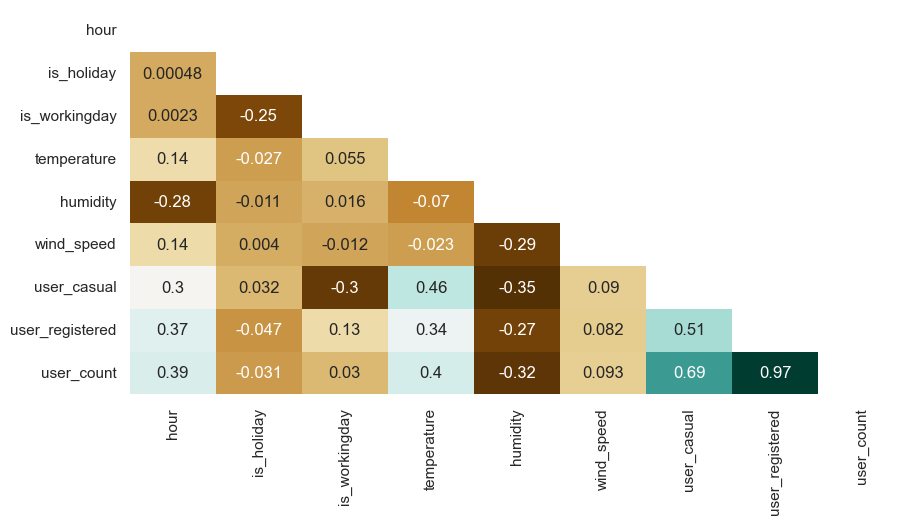

In [24]:
plt.figure(figsize=(10,5))
diagonal = np.triu(np.ones_like(bike_data.corr(), dtype=bool))
heatmap = sns.heatmap(bike_data.corr(), mask=diagonal, annot=True, cmap='BrBG', cbar=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan jumlah pengguna sepeda mencapai angka tertinggi?

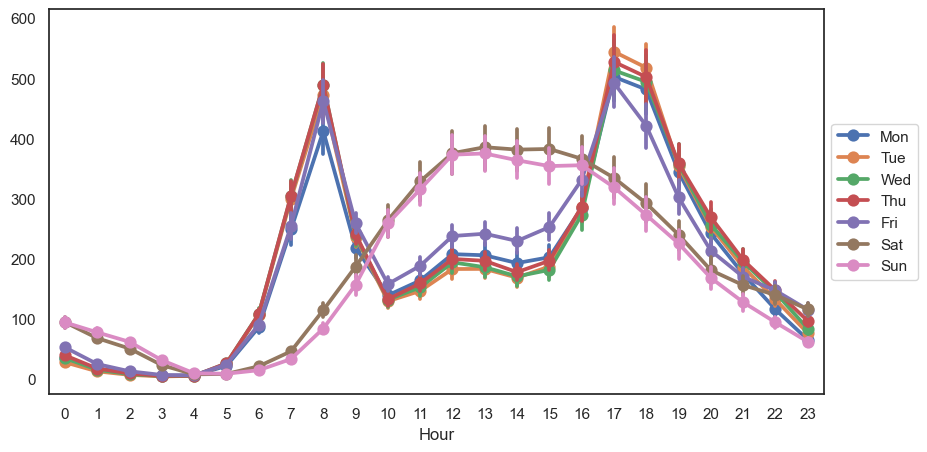

In [25]:
plt.figure(figsize=(10,5))
sns.pointplot(data=bike_data, x='hour', y='user_count', hue='day').legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("")
plt.xlabel("Hour")
plt.show()

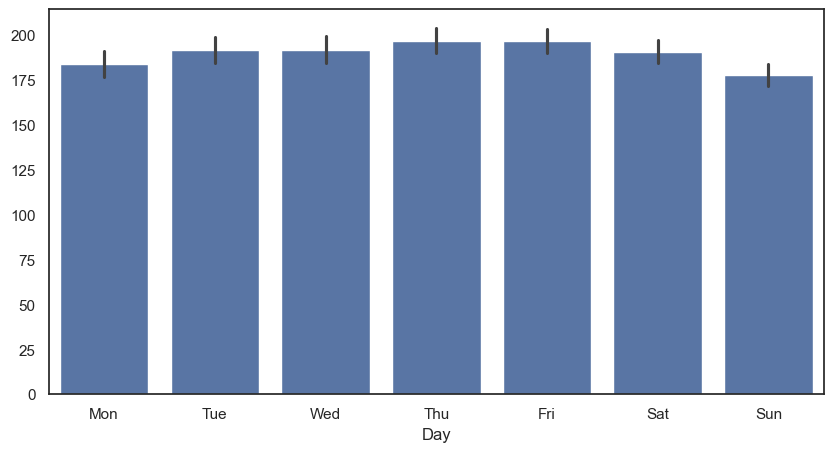

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data=bike_data, x='day', y='user_count')
plt.ylabel("")
plt.xlabel("Day")
plt.show()

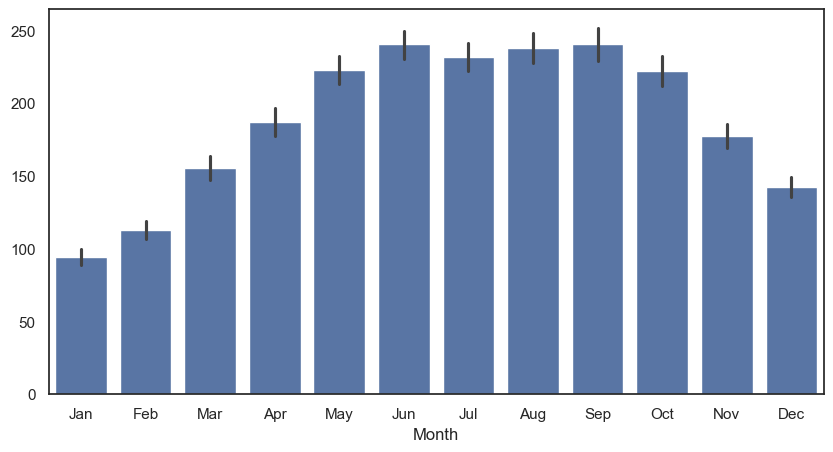

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data=bike_data, x='month', y='user_count')
plt.ylabel("")
plt.xlabel("Month")
plt.show()

### Pertanyaan 2: Bagaimana perbandingan pengguna sepeda pada tahun pertama dan kedua?

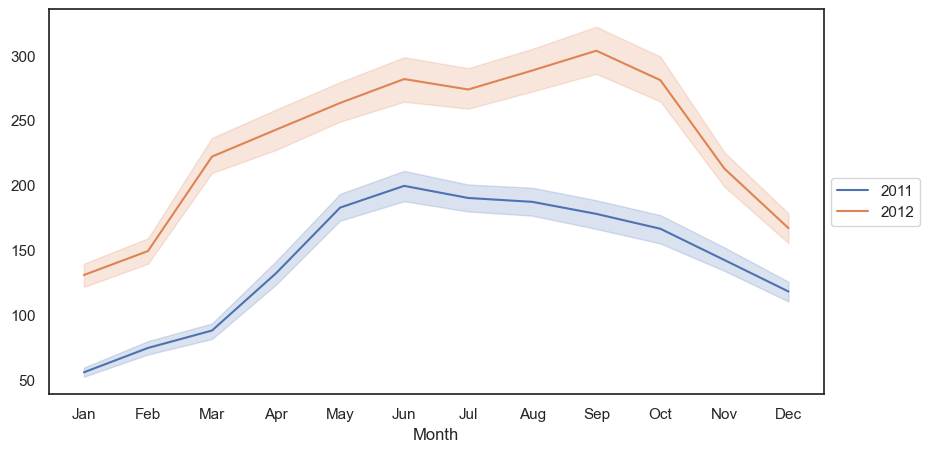

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(data=bike_data, x='month', y='user_count', hue='year').legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("")
plt.xlabel("Month")
plt.show()

### Pertanyaan 3: Bagaimana pengaruh hari libur terhadap jumlah pengguna sepeda?

Text(0.5, 0, 'Hour')

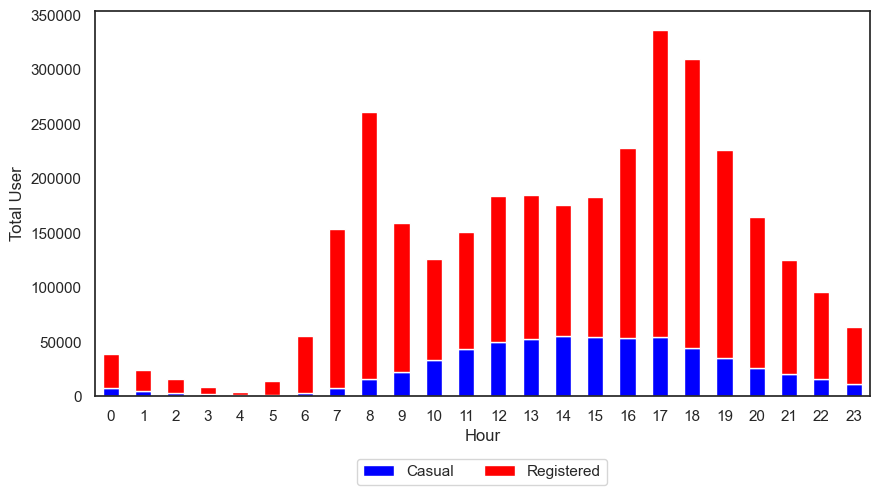

In [29]:
bike_data.groupby(by="hour")[["user_casual", "user_registered"]].sum().plot(kind="bar", stacked=True, color=["blue", "red"], figsize=(10, 5), rot=0).legend(["Casual", "Registered"], loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.ylabel('Total User')
plt.xlabel("Hour")

Text(0.5, 0, 'Day')

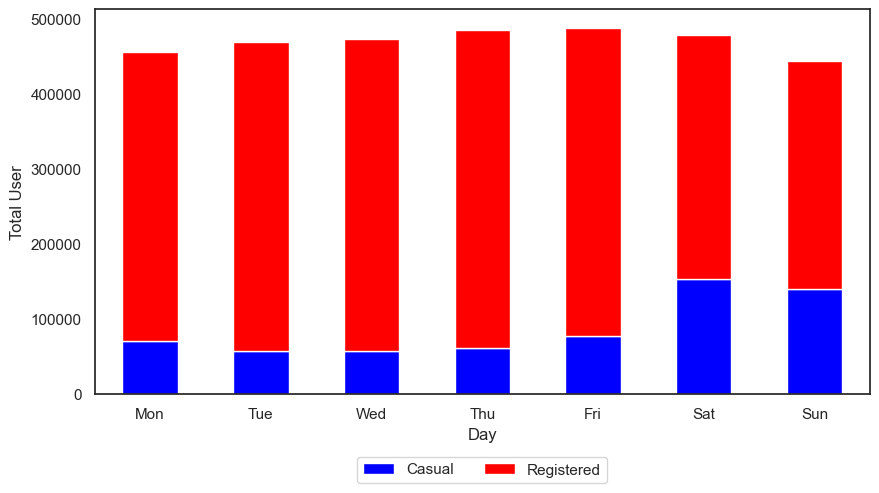

In [30]:
bike_data.groupby(by="day")[["user_casual", "user_registered"]].sum().plot(kind="bar", stacked=True, color=["blue", "red"], figsize=(10, 5), rot=0).legend(["Casual", "Registered"], loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.ylabel('Total User')
plt.xlabel("Day")

Text(0.5, 0, 'Month')

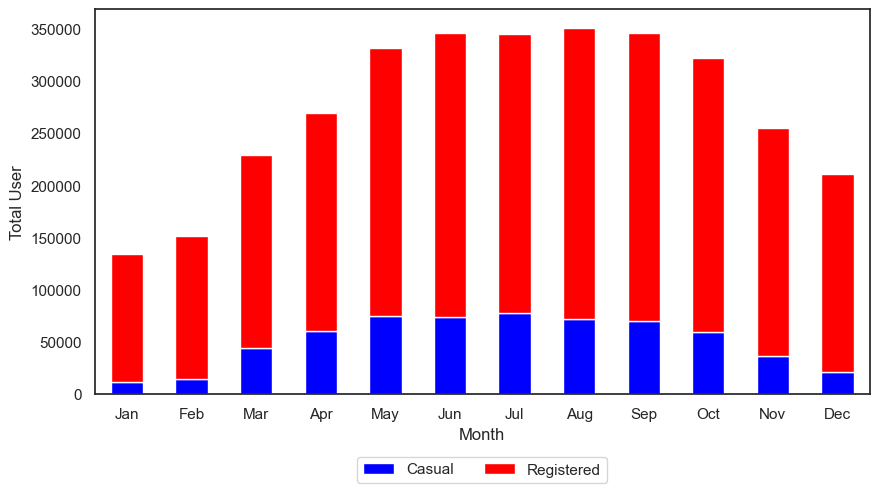

In [31]:
bike_data.groupby(by="month")[["user_casual", "user_registered"]].sum().plot(kind="bar", stacked=True, color=["blue", "red"], figsize=(10, 5), rot=0).legend(["Casual", "Registered"], loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.ylabel('Total User')
plt.xlabel("Month")

### Pertanyaan 4: Bagaimana pengaruh kondisi klimatologi terhadap pengguna sepeda?

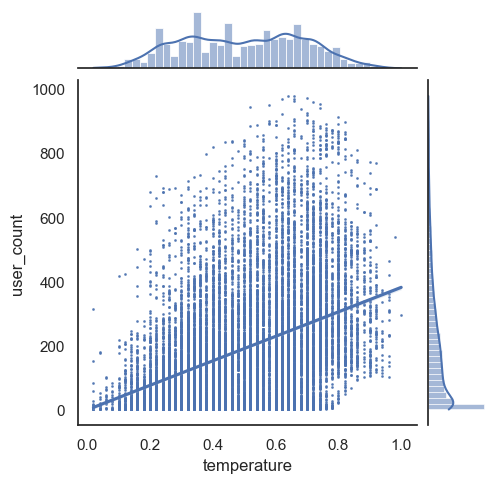

In [32]:
sns.jointplot(x="temperature", y="user_count", data=bike_data, height=5, kind="reg", scatter_kws={'s': 1})

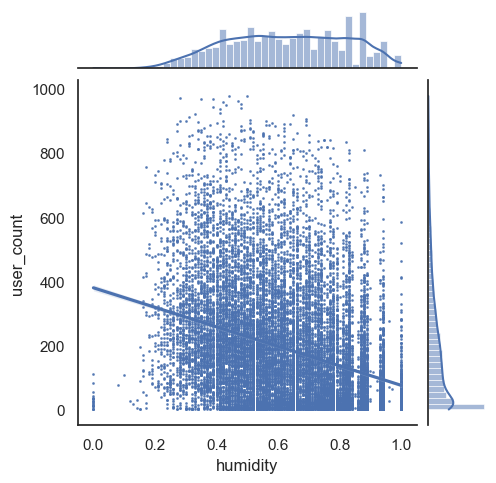

In [33]:
sns.jointplot(x="humidity", y="user_count", data=bike_data, height=5, kind="reg", scatter_kws={'s': 1})

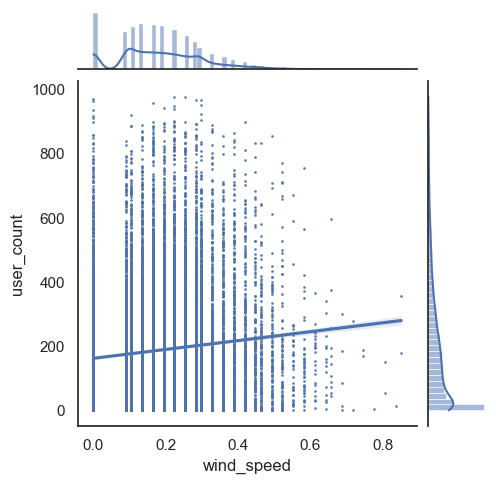

In [34]:
sns.jointplot(x="wind_speed", y="user_count", data=bike_data, height=5, kind="reg", scatter_kws={'s': 1})

## Conclusion

- Conclution pertanyaan 1
###### Terjadi 2 waktu dimana pengguna sepeda mencapai nilai tertingginya, yaitu jam 8 pagi dan jam 17-18 sore. Bisa diasumsikan kedua momen tersebut adalah jam masuk sekolah/kantor dan jam pulang sekolah/kantor. Pada akhir pekan, pengguna sepeda cenderung ramai pada jam-jam makan siang.
###### Tidak ada hari spesifik dimana pengguna sepeda melonjak, semua hari kurang lebih stabil di angka yang sama pada hari kerja ataupun akhir pekan.
###### Melihat kepada bulan, pengguna sepeda mencapai nilai puncaknya dari bulan Juni sampai September.

---


- Conclution pertanyaan 2
###### Perbedaannya terlihat cukup jelas bahwa pengguna sepeda pada tahun kedua (2012) lebih banyak dibandingkan pada tahun pertama (2011).

---


- Conclution pertanyaan 3
###### Kita sudah mengetahui bahwa pengguna sepeda tidak dipengaruhi oleh hari. Tetapi bisa di eksplor lebih lanjut mengenai jenis/kelompok pengguna sepedanya.
###### Pengguna sepeda kasual terdapat lonjakan yang cukup jelas terjadi pada akhir pekan.
###### Sebaliknya pada pengguna terdaftar, terjadi penurunan pada akhir pekan namun cukup stabil pada hari kerja. Bisa diasumsikan bahwa pengguna terdaftar kebanyakan adalah pelajar/pekerja.

---


- Conclution pertanyaan 4
###### Pengguna sepeda tidak minat untuk bersepeda saat suhu rendah dan suhu tinggi. Bisa dilihat sebarannya terletak berada ditengah-tengah, yang artinya suhu normal/tidak ekstrim.
###### Pengguna sepeda jarang dijumpai pada konsidi kelembaban rendah. Kebanyakan pengguna sepeda dijumpai saat kelembaban sedang sampai tinggi.
###### Angin kencang tidak cocok untuk bersepeda, dibuktikan dari data yang menunjukkan pengguna sepeda lebih senang bersepeda saat kecepatan angin sedang sampai rendah.

---

